✅ Dataset loaded successfully!
Shape: (503, 8)

Preview of data:
   Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373      

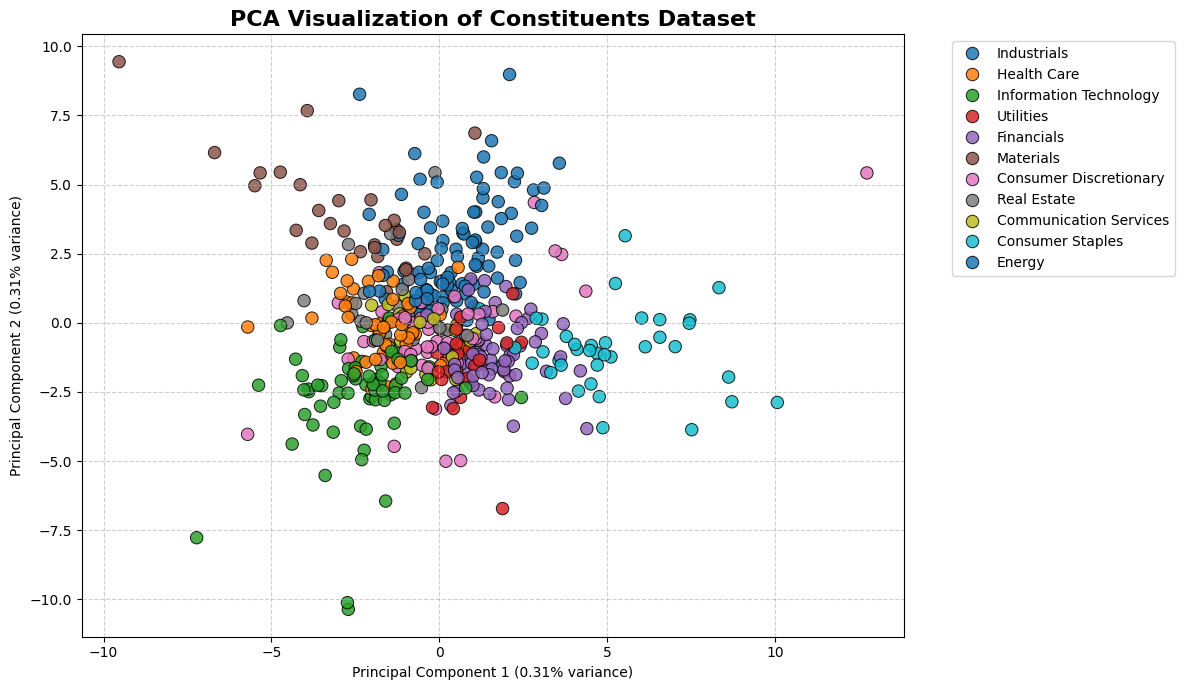


Explained Variance Ratio by Components:
  PC1: 0.31%
  PC2: 0.31%

Total Variance Explained: 0.6210145863124347 %


In [ ]:
#22BDS0226
#PAYAL CHATTERJEE
# ==============================
# PCA with Visualization - Constituents Dataset
# ==============================

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nPreview of data:\n", df.head())

# Step 2: Check data types
print("\nData types:\n", df.dtypes)

# Step 3: Handle categorical columns (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nShape after encoding:", df_encoded.shape)

# Step 4: Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Step 5: Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 6: Create PCA DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Add sector info if available for color grouping
if 'GICS Sector' in df.columns:
    pca_df['Sector'] = df['GICS Sector']
else:
    pca_df['Sector'] = 'Unknown'

# Step 7: Visualization of PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Sector',
    data=pca_df,
    palette='tab10',
    s=80, alpha=0.85, edgecolor='k'
)
plt.title("PCA Visualization of Constituents Dataset", fontsize=16, weight='bold')
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 8: Display explained variance
print("\nExplained Variance Ratio by Components:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {ratio*100:.2f}%")

print("\nTotal Variance Explained:", sum(pca.explained_variance_ratio_)*100, "%")
